In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', {"axes.linewidth": "1",'axes.yaxis.grid':False})

In [2]:
import os
import pickle as pk
import numpy as np
import pandas as pd
from phys.phys_utils import nnan_pearsonr as nnan_pearsonr
from phys import data_utils, phys_utils

from rnn_analysis import utils as analysis_utils
from phys.plot_scripts import generic_plot_utils as rr_gpu
from phys.plot_scripts import decoding_summary as dec_plots
from phys.plot_scripts import rnn_comparisons_2021 as rnn_plots
from phys.plot_scripts import neural_behavioral_traces

/home/rishir/envs/py36/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [31]:
self = neural_behavioral_traces.PlotHelper(subject_id='perle_hand_dmfc')
self.load_data()

In [38]:
(337+1552)

1889

In [37]:
1552/2058

0.7541302235179786

In [35]:
(337+1552)/(518+2058)

0.7333074534161491

In [33]:
518/2058

0.25170068027210885

In [34]:
337/1552

0.21713917525773196

In [32]:
self.data_aug['neural_responses_reliable']['occ'].shape

(1552, 79, 100)

In [30]:
self.data_aug['neural_responses_reliable']['occ'].shape

(337, 79, 100)

In [23]:
num, denom = [], []
for i in [0,1,2,3,4,5]:
    thres = 79-i
    nn = np.nansum(self.data_aug['neural_meta']['ncond_occ_alpha == 1 & ignore == 0']==thres)
    denom.append(79*nn)
    num.append(i*nn)

In [24]:
num

[0, 82, 138, 63, 168, 100]

In [25]:
np.nansum(num) / np.nansum(denom)

0.0027075634876955737

In [18]:
num

[0, 82, 138, 63, 168, 100]

In [13]:
nneur = self.data_aug['neural_responses_reliable']['occ'].shape[0]
r_all, p_all = [],[]
for i in range(nneur):
    x1 = self.data_aug['neural_responses_reliable_sh1']['occ'][i]
    x2 = self.data_aug['neural_responses_reliable_sh2']['occ'][i]
    r, p = nnan_pearsonr(x1.flatten(), x2.flatten())
    r_all.append(r)
    p_all.append(p)

In [22]:
r_all = np.array(r_all)
p_all = np.array(p_all)
idx_to_plot = np.argsort(-r_all)[50:60]

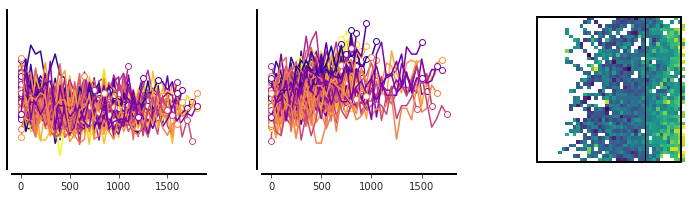

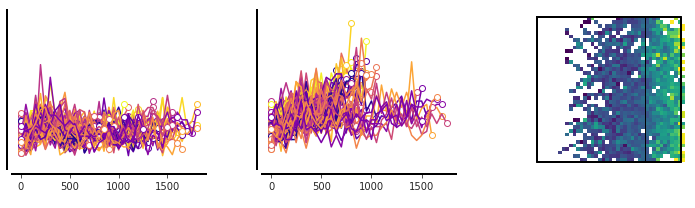

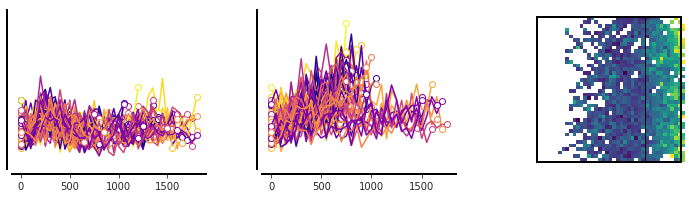

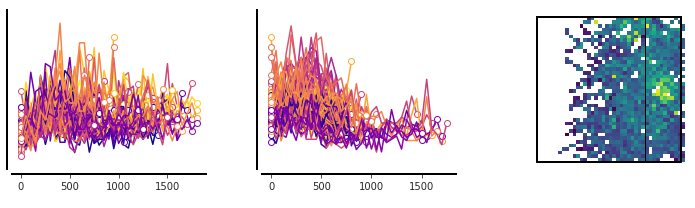

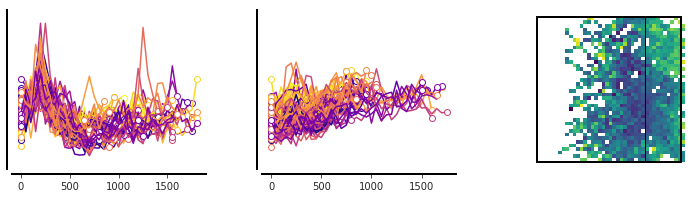

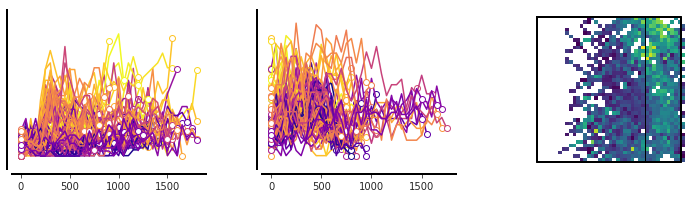

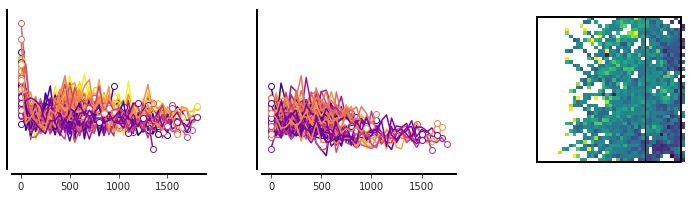

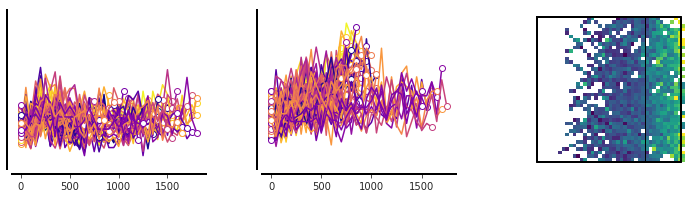

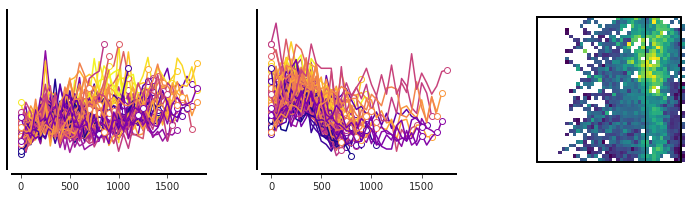

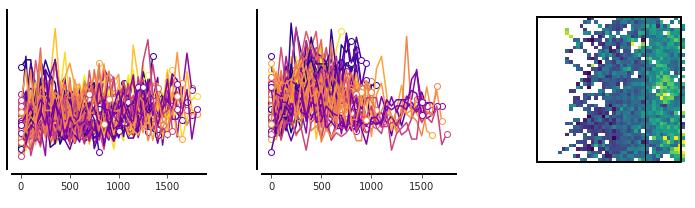

In [23]:

FR_embed = self.data_aug['neural_responses_reliable']['occ'][idx_to_plot]

for i in range(len(idx_to_plot)):
    data_fr = FR_embed[i]
    f,axes = plt.subplots(1,3,figsize=(10,3))
    ax = axes[0]
    self.plot_response_trace_over_time(ax, data_fr, 'start_occ_pad0', '-', realign_to_start=True)
    ax.set_yticks([])
    rr_gpu.make_axis_nice(ax)

    ax = axes[1]
    self.plot_response_trace_over_time(ax, data_fr, 'occ_end_pad0', '-', realign_to_start=True)
    ax.set_yticks([])
    rr_gpu.make_axis_nice(ax)
    
    ax = axes[2]
    self.plot_response_over_2d_var_heatmap(data_fr, 'ball_pos_x_TRUE', 'ball_pos_y_TRUE',
                                           mask_fn='start_end_pad0', condition=self.condition, f=f, axes=ax)
    ax.set_axis_off()
    f.savefig('%s/example_unit_%d.pdf' % (self.figoutpath, idx_to_plot[i]))

In [3]:
neural_data = data_utils.load_neural_dataset(subject_id='all_hand_dmfc', timebinsize=50, recompute_augment=False)

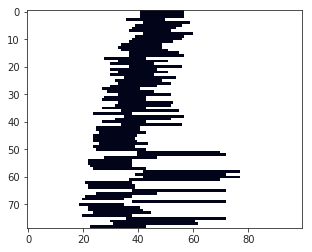

In [9]:
plt.imshow(x)

In [29]:
self.data_aug['neural_responses_reliable']['occ'].shape

(1889, 79, 100)

In [28]:
self.data_aug['neural_meta'].shape

(2691, 33)

In [7]:
for mask_fn in ['start_end_pad0', 'start_occ_pad0', 'occ_end_pad0']:
    x = np.array(neural_data['masks']['occ'][mask_fn])
    tmp = [i*50 for i in np.nansum(np.isfinite(x), axis=1)]
    mu, sig = np.nanmean(tmp), np.nanstd(tmp)
    print(mask_fn, mu, sig)

start_end_pad0 2216.4556962025317 527.5763499240644
start_occ_pad0 1291.139240506329 334.20598265131264
occ_end_pad0 975.3164556962025 290.3373657174386


In [6]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
    return fig

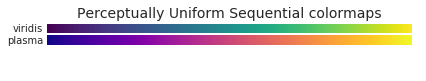

In [7]:
f = plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma'])
f.savefig('/om/user/rishir/figs/mpong_phys/paper_scratch_202202/colorbar.pdf')